# Regresión lineal múltiple

Fuente de set de datos: https://www.kaggle.com/shivam2503/diamonds

Revise, antes de comenzar, la descripción del conjunto de datos con el cual va a trabajar.

## Carga de datos

In [1]:
import pandas as pd
data_frame = pd.read_csv("3.1.6 diamonds.csv")
data_frame.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Exploración inicial

+ Conocer la cantidad de observaciones
+ Tipos de datos
+ Obtención de algunas medidas estadísticas
+ Revisar distribución de los datos
+ Revisar valores nulos
+ Conocer la correlación de variables

In [2]:
# Cantidad de obsevaciones
data_frame.shape

(53940, 11)

In [3]:
data_frame.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [4]:
# Se descarta la primera columna porque no tiene valor predictivo
data_frame = data_frame.drop(["Unnamed: 0"],axis=1)
data_frame.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
# Medidas estadísticas
data_frame.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
# Considerando solo las columnas de tipo object
import numpy as np
data_frame.describe(include=[np.object])

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [6]:
# Valores nulos
for feature in data_frame.columns:
    print('Total de valores nulos de', feature, '=', data_frame[feature].isna().sum())

Total de valores nulos de carat = 0
Total de valores nulos de cut = 0
Total de valores nulos de color = 0
Total de valores nulos de clarity = 0
Total de valores nulos de depth = 0
Total de valores nulos de table = 0
Total de valores nulos de price = 0
Total de valores nulos de x = 0
Total de valores nulos de y = 0
Total de valores nulos de z = 0


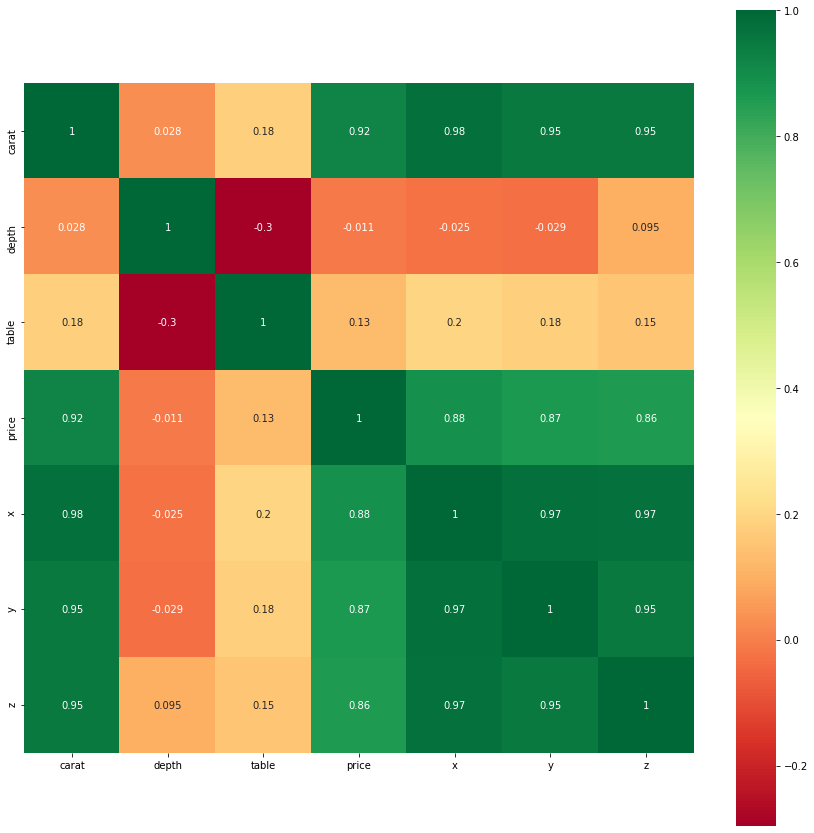

In [8]:
## Correlación de las variables
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,15))
p=sns.heatmap(data_frame.corr(), annot=True,cmap='RdYlGn',square=True)

### Comentarios de gráfico
- La columna 'carat' posee la mayor correlación (0.92)
- x, y, z tienen una correlación bastante alta con el precio

## Análisis de 4 características (carat,x,y,z)

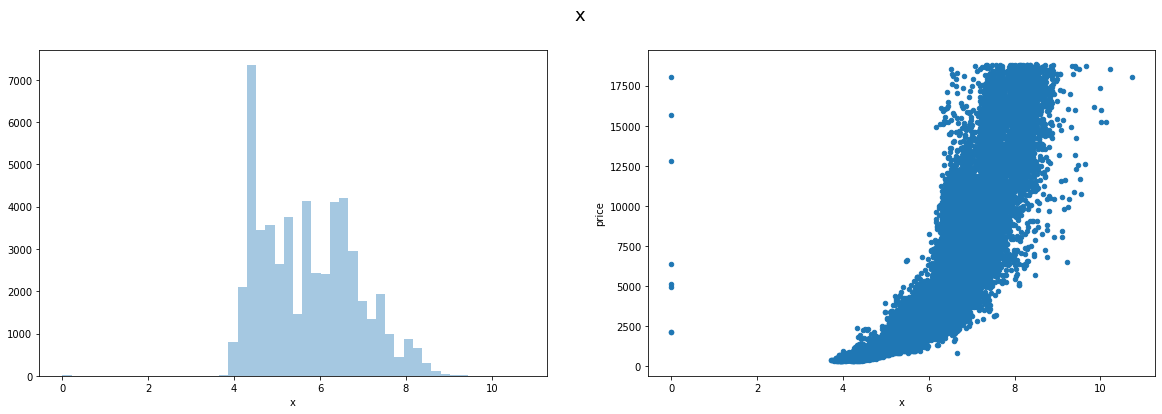

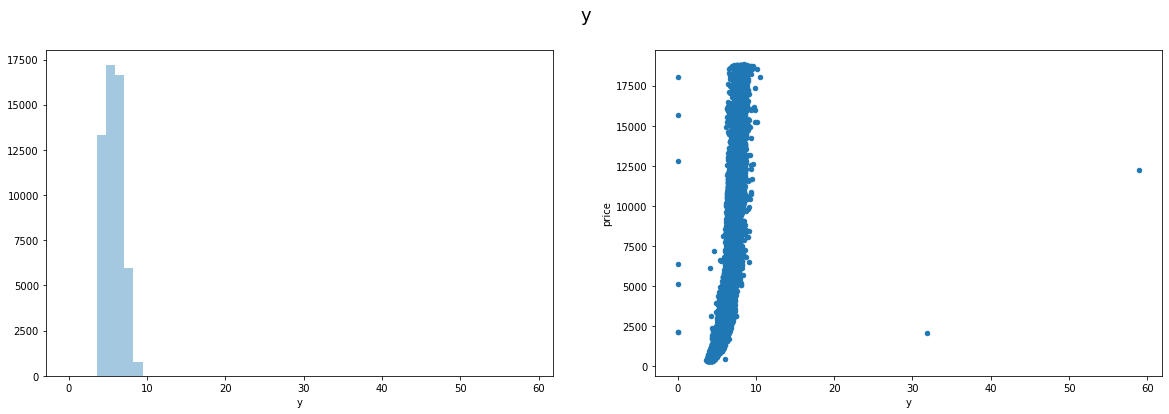

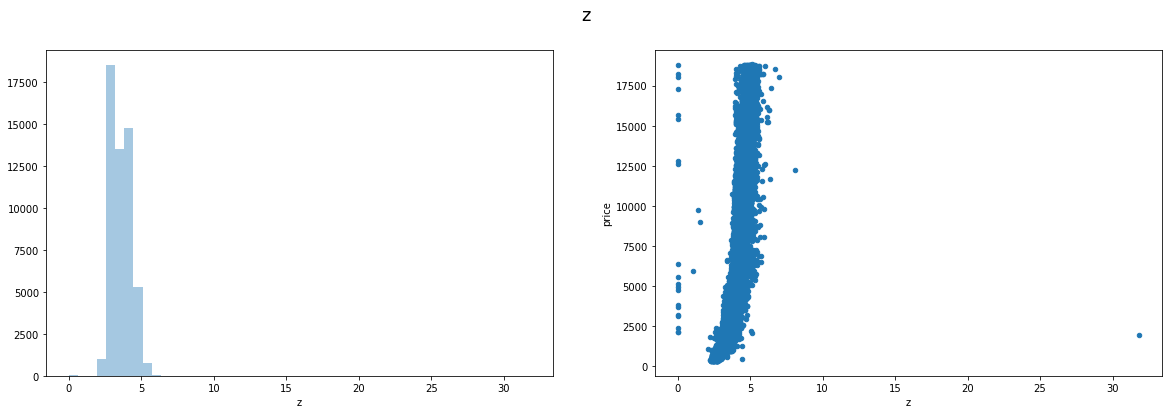

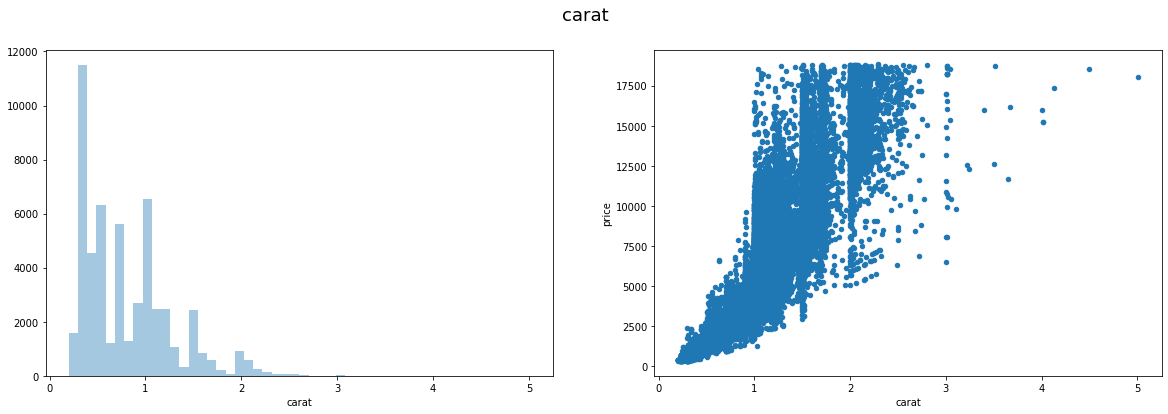

In [10]:
for col in ['x', 'y', 'z', 'carat']:
    fig, ax =plt.subplots(1, 2, figsize=(20, 6))
    fig.suptitle(col, fontsize=18)
    sns.distplot(data_frame[col], ax=ax[0], kde=False)
    data_frame[[col]+['price']].plot.scatter(x=col, y='price', ax=ax[1])
    plt.show()

### Comentarios

De las gráficas anteriores se visualiza que hay obsevaciones que tienen valores 0 en estas características, lo que no tiene mucho sentido porque representan el ancho, alto y profundidad del diamante.

Dada la conclusión anterior, se eliminarán estas observaciones

In [11]:
data_frame = data_frame[(data_frame[['x','y','z']] != 0).all(axis=1)]
data_frame.shape

(53920, 10)

Una vez que se han eliminado las observaciones quedan 53.920 observaciones

Ahora se vuelven a ver las distribuciones.

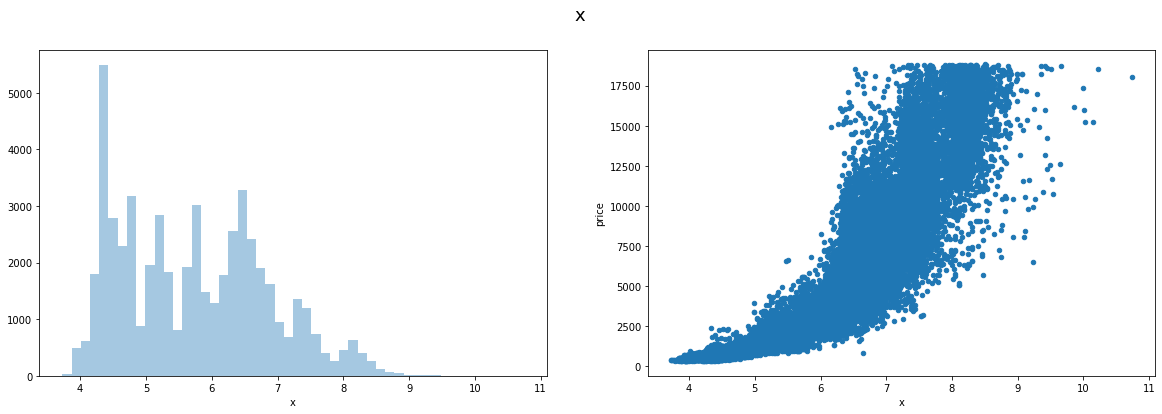

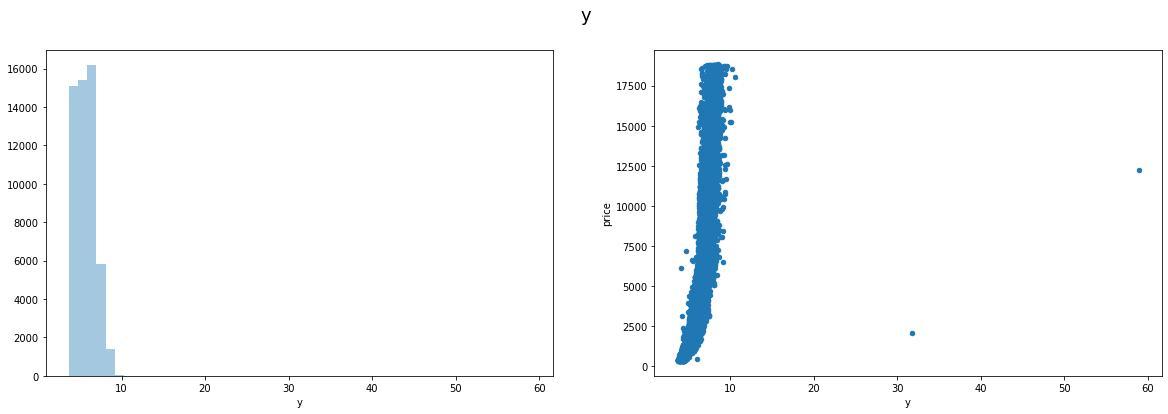

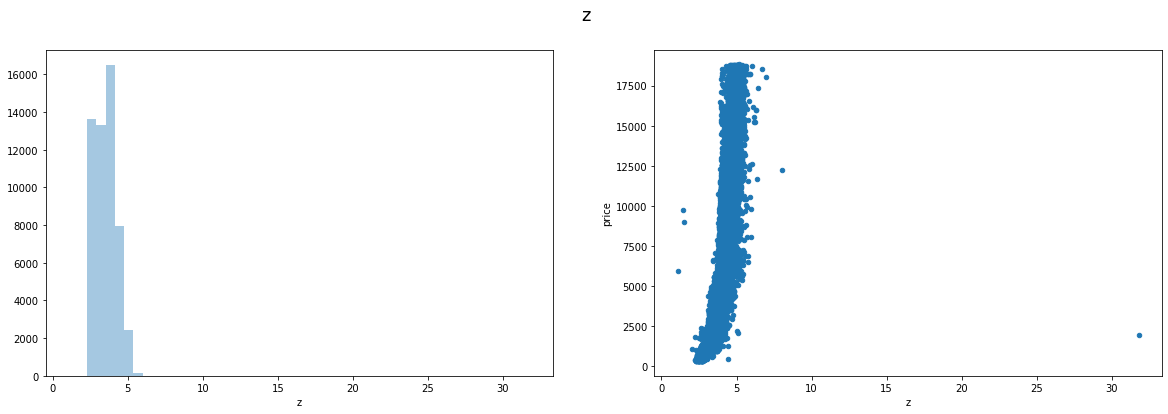

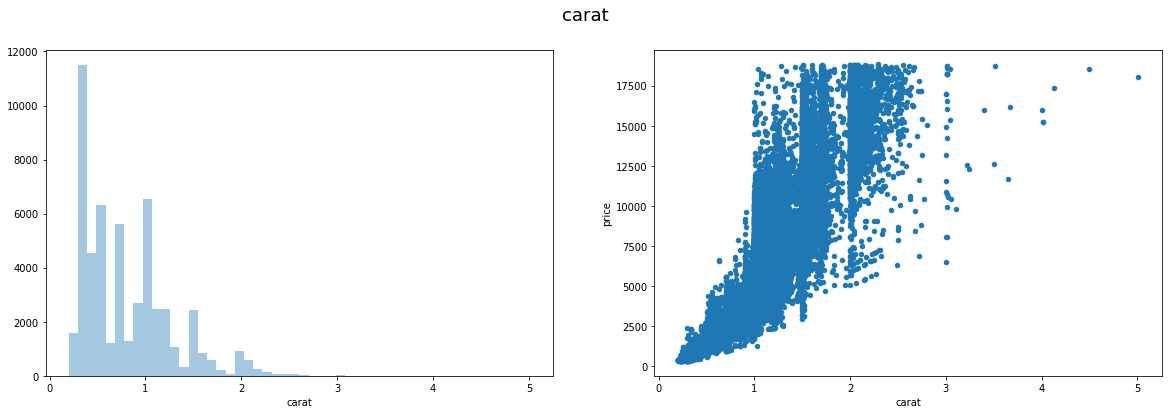

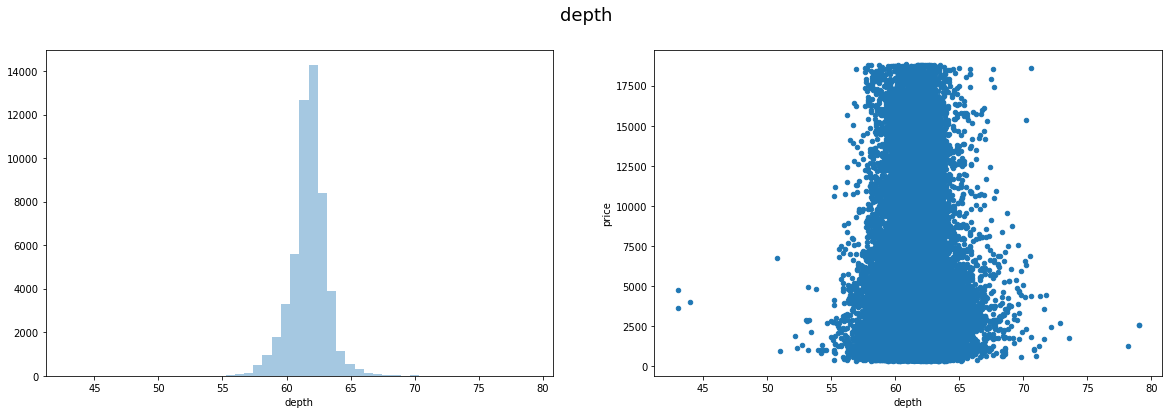

In [14]:
# Visualizamos la distribución de las variables
columnas = ['x', 'y', 'z', 'carat', 'depth']
for col in columnas:
    fig, ax =plt.subplots(1, 2, figsize=(20, 6))
    fig.suptitle(col, fontsize=18)
    sns.distplot(data_frame[col], ax=ax[0], kde=False)
    data_frame[[col]+['price']].plot.scatter(x=col, y='price', ax=ax[1])
    plt.show()

## Tratamiento de variables categóricas

Es importante recordar que estas variables no han sido consideradas en el análisis de correlación anterior porque no son numéicas; así es que conveniente considerarlas

Primero se van a revisar los valores únicos de cada variable categórica.

Luego se van a transformar usando onehot-encoder

In [15]:
data_frame['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [17]:
data_frame['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [18]:
data_frame['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['cut'])], remainder='passthrough')
X = np.array(ct.fit_transform(data_frame))
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,0,1,0,0,0.23,E,SI2,61.5,55,326,3.95,3.98,2.43
1,0,0,0,1,0,0.21,E,SI1,59.8,61,326,3.89,3.84,2.31
2,0,1,0,0,0,0.23,E,VS1,56.9,65,327,4.05,4.07,2.31
3,0,0,0,1,0,0.29,I,VS2,62.4,58,334,4.2,4.23,2.63
4,0,1,0,0,0,0.31,J,SI2,63.3,58,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53915,0,0,1,0,0,0.72,D,SI1,60.8,57,2757,5.75,5.76,3.5
53916,0,1,0,0,0,0.72,D,SI1,63.1,55,2757,5.69,5.75,3.61
53917,0,0,0,0,1,0.7,D,SI1,62.8,60,2757,5.66,5.68,3.56
53918,0,0,0,1,0,0.86,H,SI2,61,58,2757,6.15,6.12,3.74


## Desafío

Repita la técnica de transformación con las otras 2 columnas y comente los resultados

## Creando, validando y evaluando el modelo

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Se separan las variables predictoras y la predecida

x = data_frame[['x','y', 'z', 'carat']] # Variables independientes
y = data_frame['price'] # Variable dependiente

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, random_state=29)
# Tipo de modelo
modelo = LinearRegression()

# Entrenamiento del modelo
modelo.fit(X_train, y_train)

# Validación del modelo
y_pred = modelo.predict(X_test)

# Evaluación del modelo
print("R2 :%.2f" % r2_score(y_test, y_pred))
print("MSE: %.2f" % mean_squared_error(y_pred, y_test))
print("Score del modelo : %.2f" % modelo.score(X_train, y_train))

R2 :0.85
MSE: 2424851.71
Score del modelo : 0.86


## Realizando predicciones

In [32]:
print(modelo.predict([[4.15, 3.95, 2.25, 0.29]]))


[657.29432223]


## Mejoras

Ya se generó un modelo de predicción del precio de un diamante considerando su alto, ancho, profundidad y peso del diamante.

Sin embargo, estas variables no están normalizadas. El desafío ahora es repetir el ejercicio considerando las variables normalizadas.

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_selected = data_frame[['x','y', 'z', 'carat']]
scaled_data = sc.fit_transform(data_selected)
pd.DataFrame(scaled_data).head()

,0,1,2,3
0,-1.591573,-1.539219,-1.580084,-1.198204
1,-1.645173,-1.662014,-1.750896,-1.240417
2,-1.502241,-1.460280,-1.750896,-1.198204
3,-1.368242,-1.319943,-1.295396,-1.071566
4,-1.243176,-1.214690,-1.124583,-1.029353


In [36]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, 
                                                    test_size=0.2, random_state=29)
# Tipo de modelo
modelo_x = LinearRegression()

# Entrenamiento del modelo
modelo_x.fit(X_train, y_train)

# Validación del modelo
y_pred = modelo_x.predict(X_test)

# Evaluación del modelo
print("R2 :%.2f" % r2_score(y_test, y_pred))
print("MSE: %.2f" % mean_squared_error(y_pred, y_test))
print("Score del modelo : %.2f" % modelo_x.score(X_train, y_train))

R2 :0.85
MSE: 2424851.71
Score del modelo : 0.86


In [37]:
# Se realiza la misma predicción anterior
print(modelo.predict([[4.15, 3.95, 2.25, 0.29]]))

[657.29432223]
